## Importing required libraries

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import cv2

## Load the data

In [4]:
def load_csv():
    return pd.read_csv('Video_Games_Sales.csv')

## Accessing the dataframe

In [5]:
df = load_csv()
df.head()
# Number of Attributes in the Dataset: 16 Attributes
# NAME- Name of the video Game
# PLATFORM- Console on which the game is available
# YEAR_OF_RELEASE- Year in which it was released
# GENRE- Game's Category
# PUBLISHER- The company under which the game has been released
# NA_SALES- Game sales in North America (in millions of units)
# EU SALES- Game sales in European Union (in millions of units)
# JP_SALES- Game sales in Japan (in millions of units)
# OTHER_SALES- Game sales in the rest of the world, i.e. Africa, Asia 
# excluding Japan,Europe excluding the E.U. 
# GLOBAL_SALES- Total sales in the world (in millions of units)
# CRITIC_SCORE- Average Score given by professional critics
# CRITIC_COUNT- Number of Critics that Scored the game
# USER_SCORE- Average Score given by users
# USER_COUNT- Number of Users that Scored the game
# DEVELOPER- Developing company of the game 
# RATING- Suitable target audience rating; E(Everyone), E10+(Everyone 10+), T(Teen 13+), M(Mature +17)
#

,Name,Platform,Year_of_Release,Genre,Genre_Identifier,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Sales Category
0,Wii Sports,Wii,2006.0,Sports,2,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E,HIGH
1,Mario Kart Wii,Wii,2008.0,Racing,5,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E,MEDIUM
2,Wii Sports Resort,Wii,2009.0,Sports,2,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E,MEDIUM
3,New Super Mario Bros.,DS,2006.0,Platform,6,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E,MEDIUM
4,Wii Play,Wii,2006.0,Misc,7,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E,MEDIUM


## Get information about the dataframe

In [6]:
df.info()
# Year_of_Release has 78 missing values
# Publisher has 4 missing values
# Developer has 4 missing values
# Rating has 70 missing
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              7017 non-null   object 
 1   Platform          7017 non-null   object 
 2   Year_of_Release   6939 non-null   float64
 3   Genre             7017 non-null   object 
 4   Genre_Identifier  7017 non-null   int64  
 5   Publisher         7013 non-null   object 
 6   NA_Sales          7017 non-null   float64
 7   EU_Sales          7017 non-null   float64
 8   JP_Sales          7017 non-null   float64
 9   Other_Sales       7017 non-null   float64
 10  Global_Sales      7017 non-null   float64
 11  Critic_Score      7017 non-null   int64  
 12  Critic_Count      7017 non-null   int64  
 13  User_Score        7017 non-null   float64
 14  User_Count        7017 non-null   int64  
 15  Developer         7013 non-null   object 
 16  Rating            6947 non-null   object 


In [7]:
df["Genre"].value_counts()
# The value-counts() method gives the count of each catagory present in the attribute

Action          1677
Sports           973
Shooter          886
Role-Playing     721
Racing           598
Platform         407
Misc             396
Fighting         383
Simulation       306
Strategy         284
Adventure        265
Puzzle           121
Name: Genre, dtype: int64

In [8]:
df["Year_of_Release"].value_counts()

2008.0    600
2007.0    596
2005.0    566
2009.0    555
2006.0    531
2003.0    505
2004.0    480
2011.0    475
2002.0    459
2010.0    433
2012.0    321
2013.0    273
2001.0    257
2014.0    256
2016.0    227
2015.0    221
2000.0    102
1999.0     30
1998.0     26
1997.0     14
1996.0      8
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: Year_of_Release, dtype: int64

In [9]:
df.describe()

,Year_of_Release,Genre_Identifier,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6939.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,2007.477014,4.331481,0.389290,0.233095,0.062951,0.081525,0.767049,70.249822,28.783241,7.182428,173.432664
std,4.231331,3.150107,0.957051,0.679210,0.284162,0.266594,1.940317,13.880646,19.167119,1.441241,581.977516
min,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,2.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,3.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,7.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,12.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


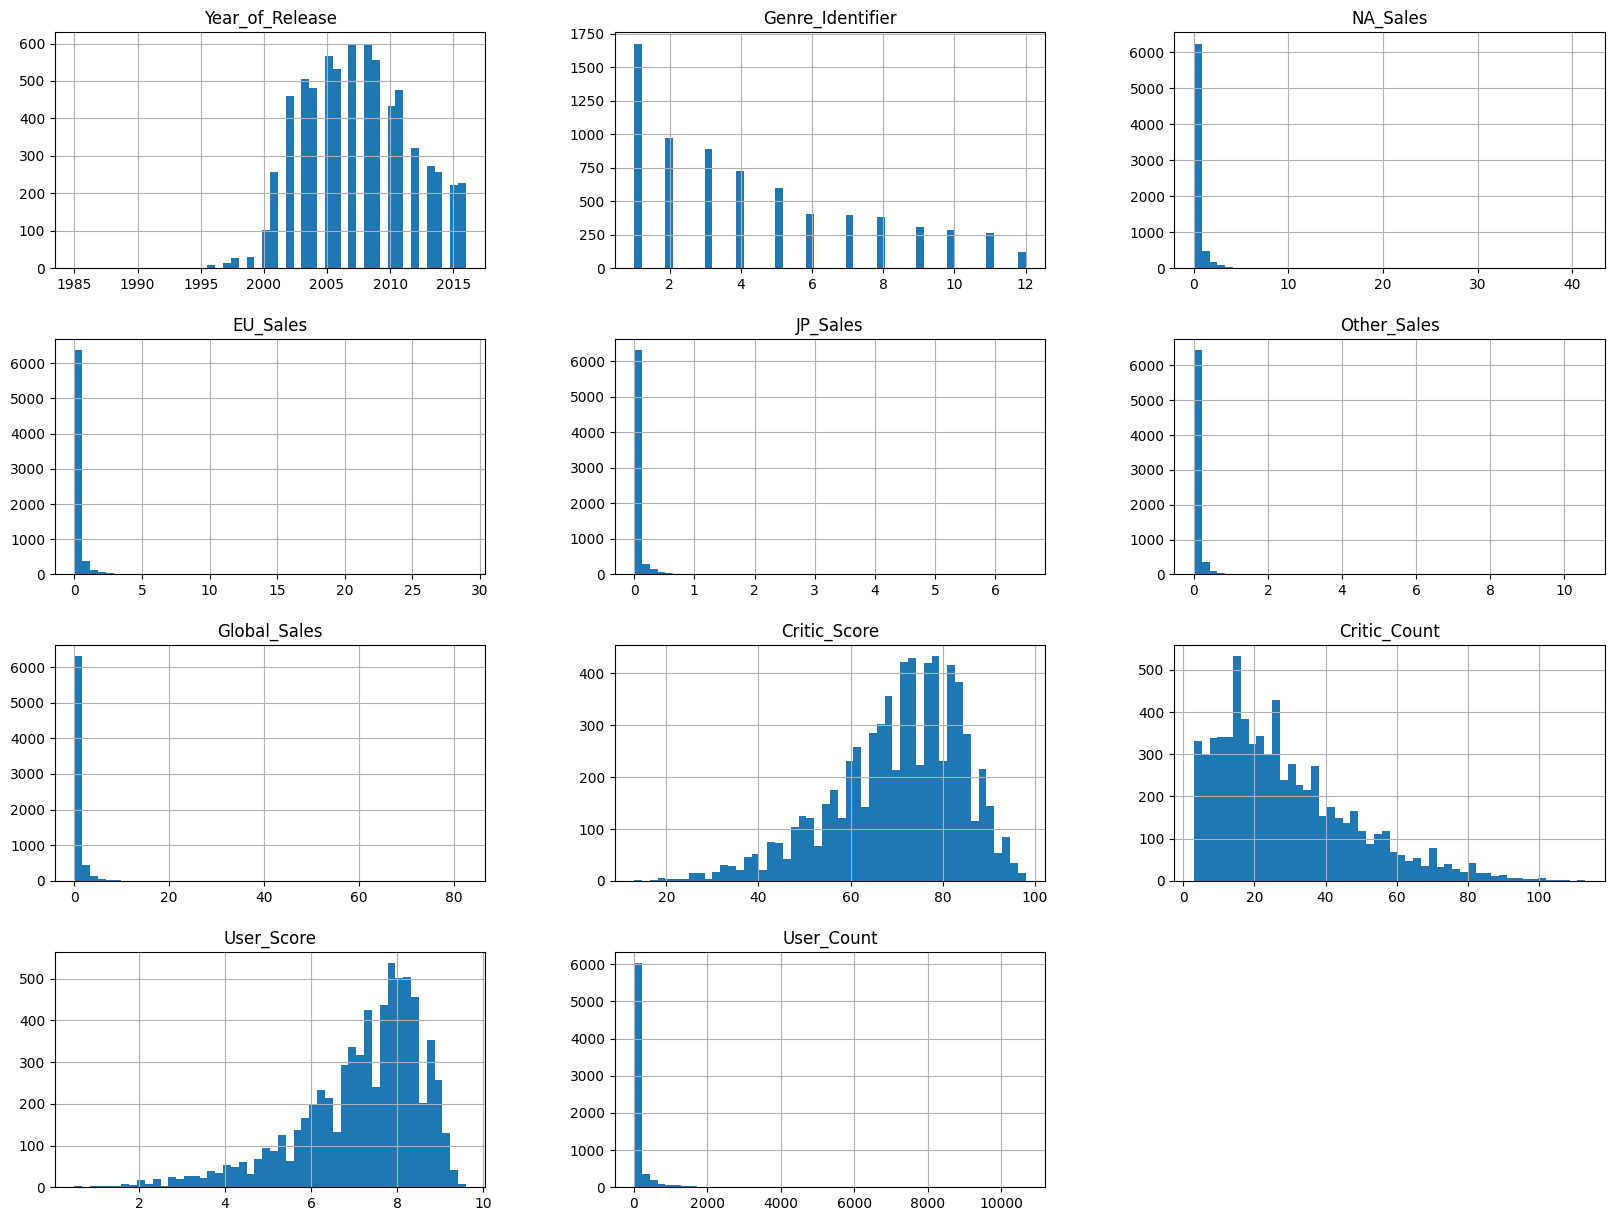

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()
# The year of release with the most unit sales is 2008 with 600 million units,
# followed by 2007 with 596 million units and 1988, 1985, 1992, 1994 with the lowest at 1 million units each
# 
#
#
#

<AxesSubplot: xlabel='NA_Sales', ylabel='Year_of_Release'>

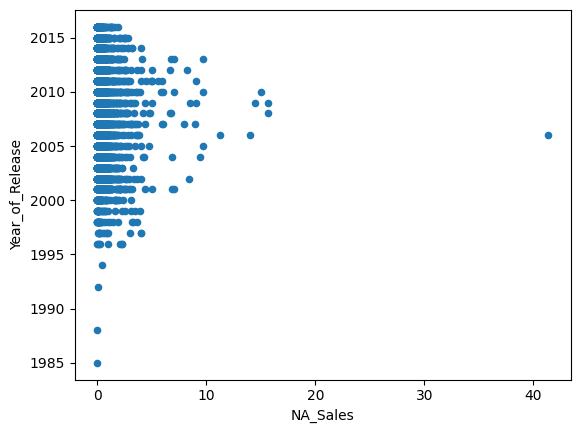

In [11]:
df.plot(kind="scatter", x="NA_Sales", y="Year_of_Release")

##  Visualizing Geographical Data

<AxesSubplot: xlabel='JP_Sales', ylabel='Genre'>

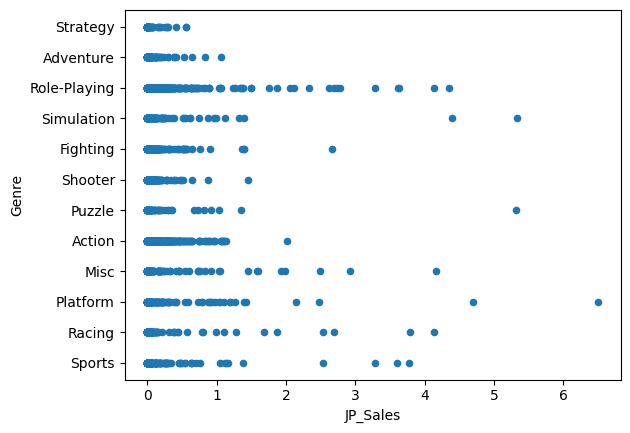

In [12]:
df.plot(kind="scatter", x="JP_Sales", y="Genre")

<AxesSubplot: xlabel='EU_Sales', ylabel='Genre'>

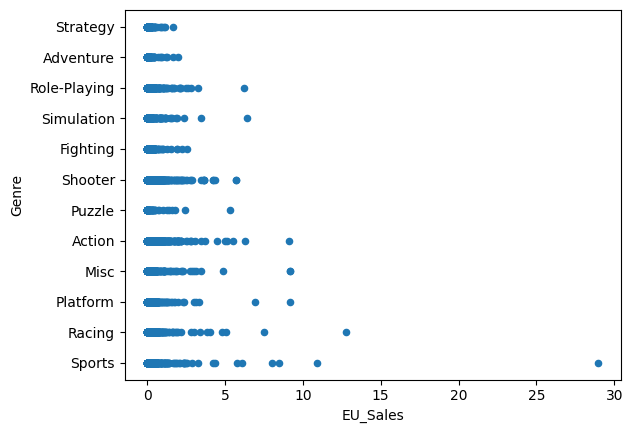

In [13]:
df.plot(kind="scatter", x="EU_Sales", y="Genre")

<AxesSubplot: xlabel='Other_Sales', ylabel='Genre'>

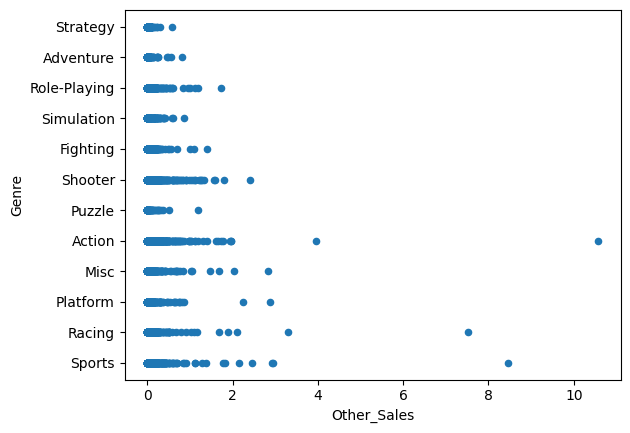

In [14]:
df.plot(kind="scatter", x="Other_Sales", y="Genre")

<AxesSubplot: xlabel='Global_Sales', ylabel='Genre'>

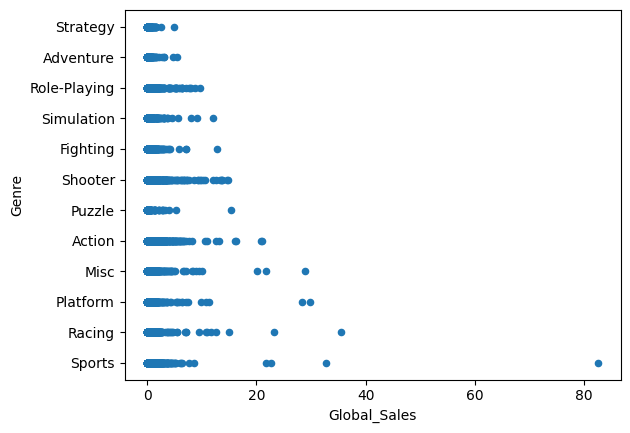

In [15]:
df.plot(kind="scatter", x="Global_Sales", y="Genre")

<AxesSubplot: xlabel='Global_Sales', ylabel='Genre'>

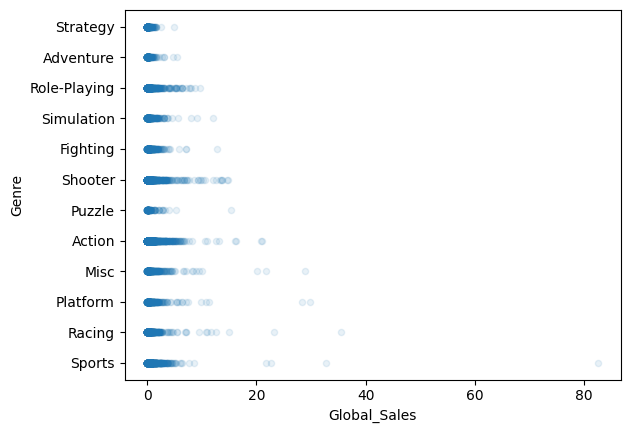

In [16]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.1)

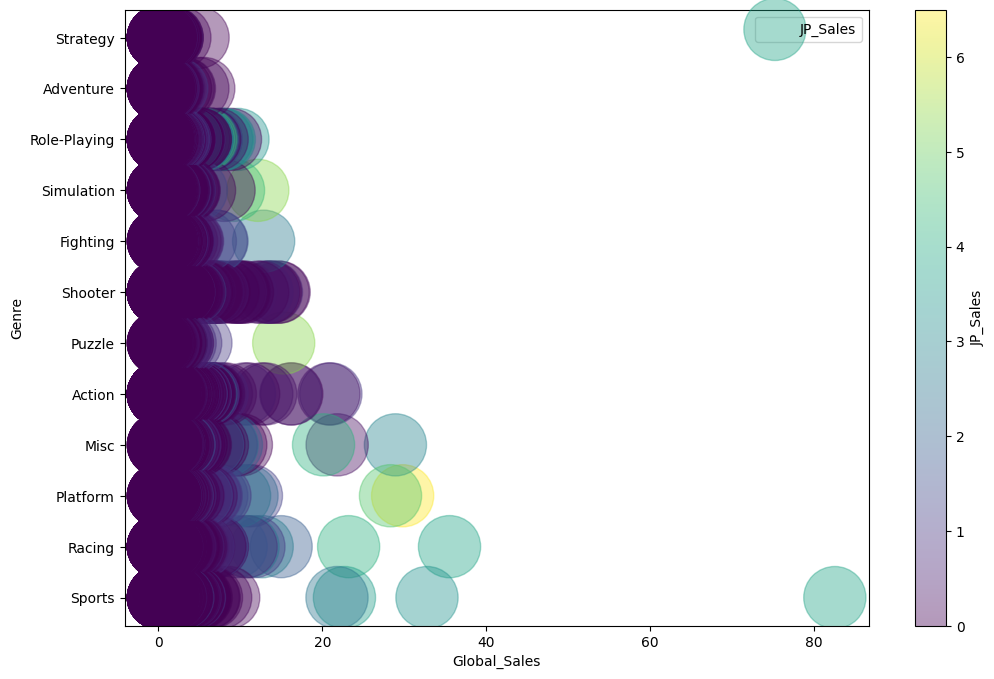

In [17]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.4,
    s=df["Year_of_Release"], label= "JP_Sales",figsize=(12,8),
    c="JP_Sales", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Top Ten Best Selling Games Regionally 

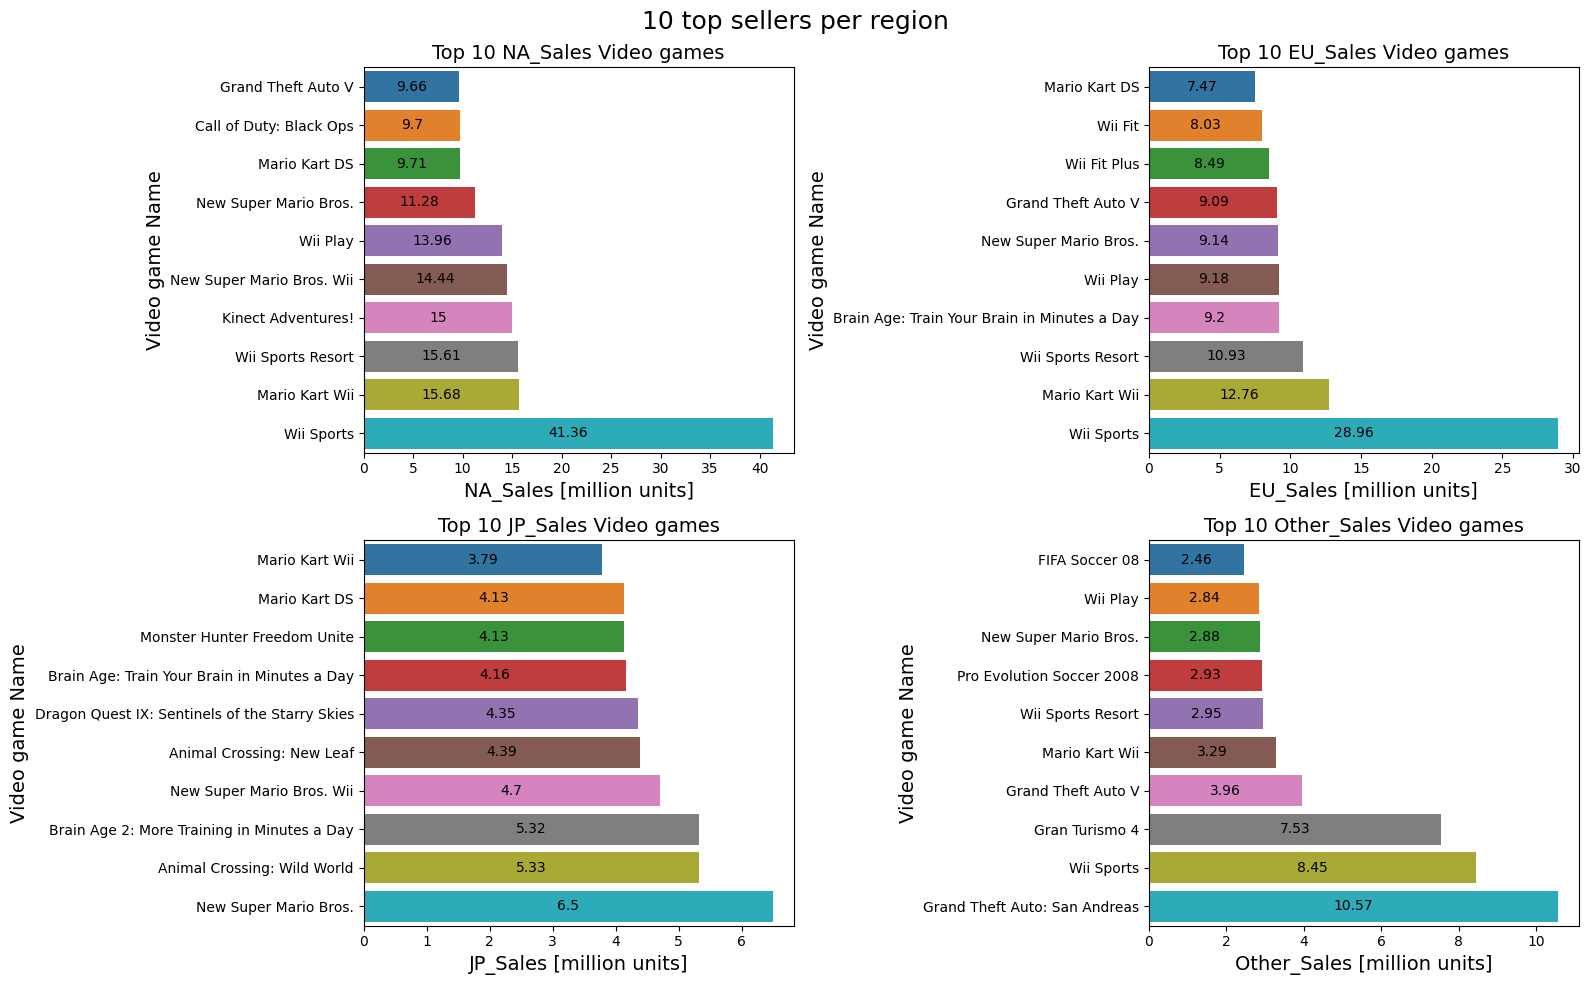

In [18]:
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig,axes = plt.subplots(int(len(sales_regions)/2),int(len(sales_regions)/2), figsize=(16,10))
axes = axes.ravel() #Required for array typing ???
for index, region in enumerate(sales_regions):
    data_sales_sort = df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Name'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Video game Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center')
    
plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

# Shayma's Done

# Code from "https://www.kaggle.com/code/baptisteadn/a-brief-analysis-of-video-games-sales/notebook"

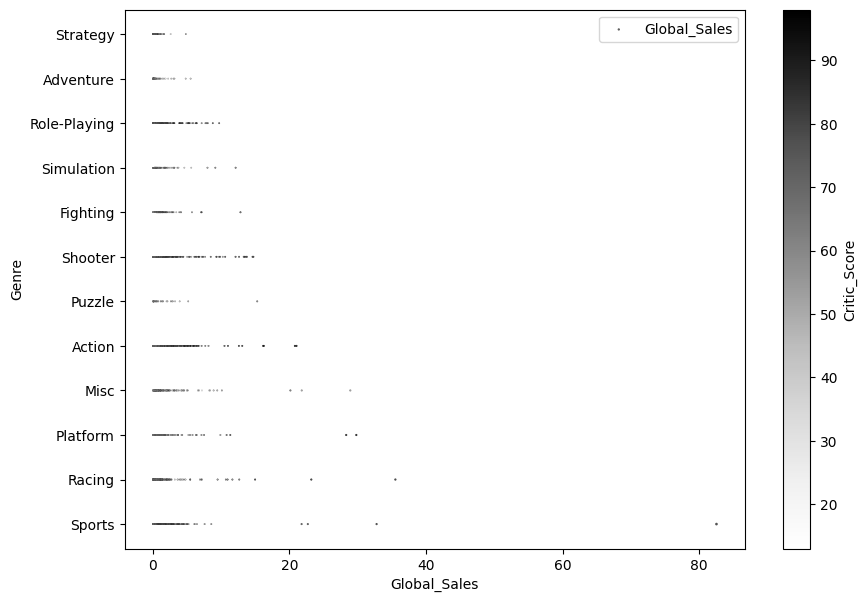

In [19]:
df.plot(kind="scatter", x="Global_Sales", y="Genre",
    s=df["Global_Sales"]/100, label="Global_Sales", figsize=(10,7),
    c="Critic_Score", colorbar=True,
)
plt.legend()

In [20]:
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

C:\Users\sadiq\AppData\Local\Temp\ipykernel_29340\1132132967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes


In [21]:
corr_matrix["Global_Sales"].sort_values(ascending=False)

Global_Sales        1.000000
NA_Sales            0.955487
EU_Sales            0.938667
Other_Sales         0.804513
JP_Sales            0.612539
Critic_Count        0.289301
User_Count          0.262935
Critic_Score        0.236953
User_Score          0.088583
Year_of_Release     0.002078
Genre_Identifier   -0.042292
Name: Global_Sales, dtype: float64

array([[<AxesSubplot: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='JP_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Genre_Identifier'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot

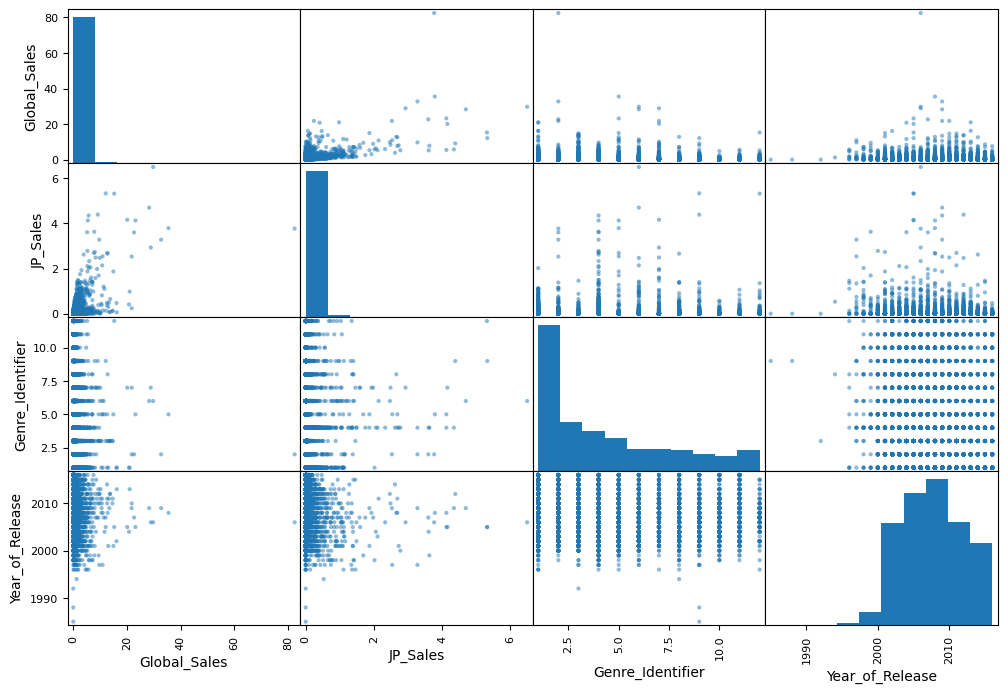

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["Global_Sales", "JP_Sales", "Genre_Identifier", "Year_of_Release"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

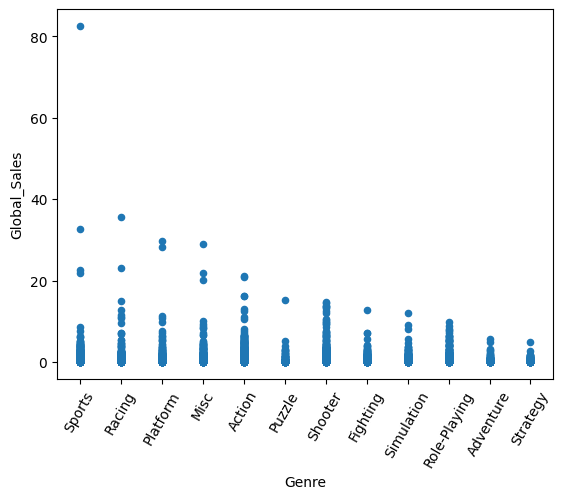

In [23]:
df.plot(kind="scatter", x="Genre", y="Global_Sales")
plt.xticks(rotation=60)

array([[<AxesSubplot: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Critic_Score'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Critic_Score'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Year_of_Release'>]],
      dtype=object)

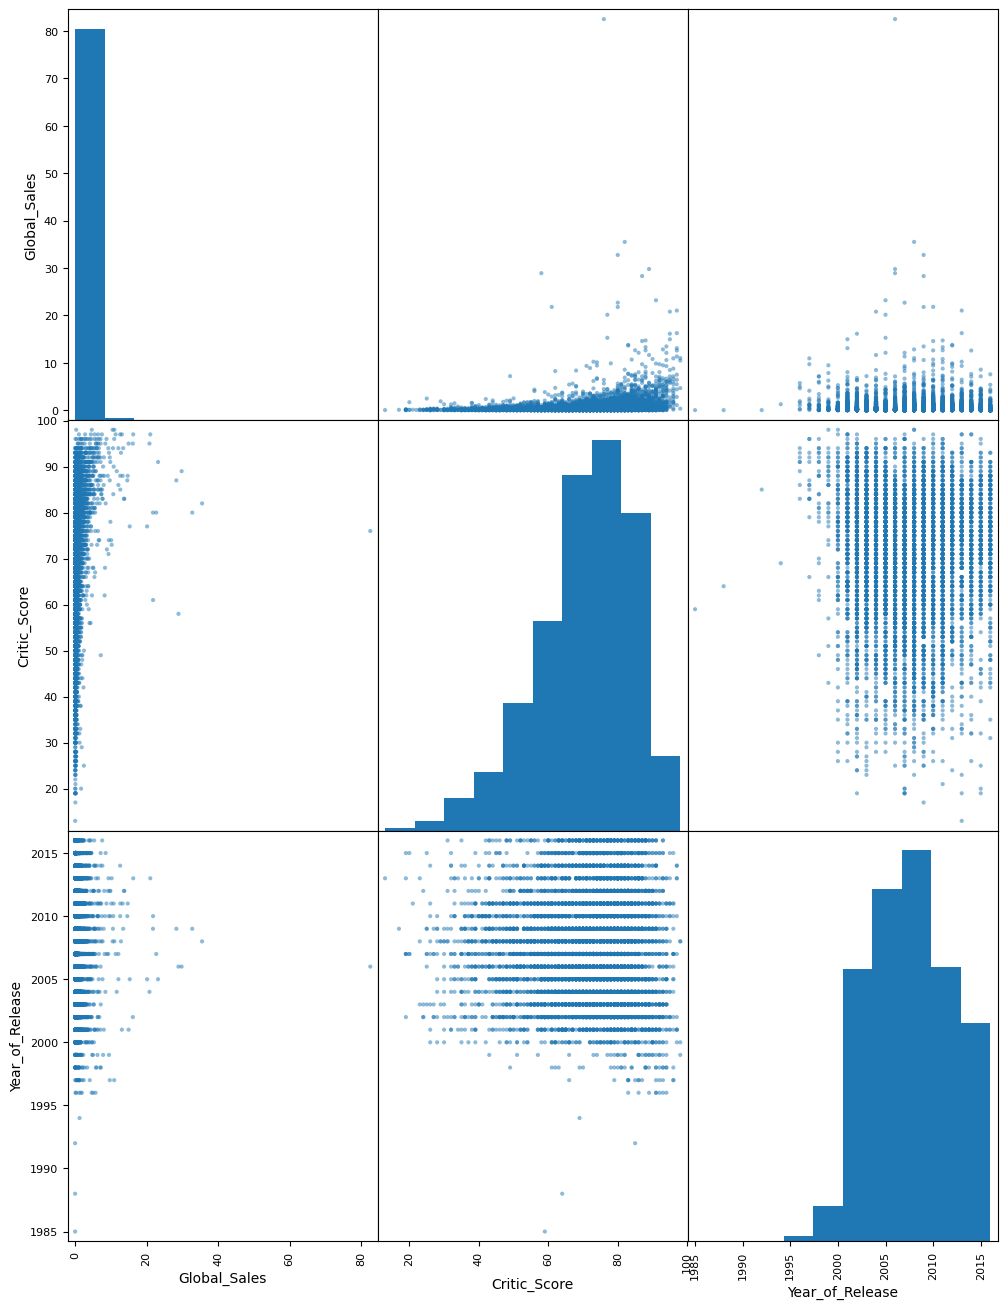

In [24]:
a=['Global_Sales', 'Critic_Score', 'Year_of_Release']
scatter_matrix(df[a], figsize=(12, 16))

## Data Cleaning

In [25]:
df[df.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Genre_Identifier,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Sales Category
549,R4: Ridge Racer Type 4,PS,1998.0,Racing,5,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06,88,18,9.2,21,Namco,NaN,LOW
1137,Football Manager 2013,PC,2012.0,Sports,2,Sega,0.00,0.95,0.00,0.21,1.15,86,37,6.7,228,Sports Interactive,NaN,LOW
1322,Monster Rancher,PS,1997.0,Simulation,9,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,86,5,8.3,10,Tecmo,NaN,LOW
1941,100 Classic Books,DS,2008.0,Misc,7,Nintendo,0.12,0.52,0.00,0.02,0.66,70,7,6.0,12,Genius Sonority Inc.,NaN,LOW
2564,Sonic the Hedgehog,PS3,2006.0,Platform,6,NaN,0.00,0.48,0.00,0.00,0.48,43,17,4.1,176,Sonic Team,E10+,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,Root Letter,PS4,2016.0,Adventure,11,PQube,0.00,0.00,0.01,0.00,0.01,69,13,7.5,11,Kadokawa,NaN,LOW
6985,Colin McRae Rally 04,PC,2004.0,Racing,5,Codemasters,0.00,0.01,0.00,0.00,0.01,87,6,7.2,44,Codemasters,NaN,LOW
6986,Virtua Quest,GC,NaN,Role-Playing,4,Unknown,0.01,0.00,0.00,0.00,0.01,55,19,5.5,12,Artificial Mind and Movement,T,LOW
7010,Prison Architect,XOne,2016.0,Action,1,Introversion Software,0.01,0.00,0.00,0.00,0.01,74,13,6.7,7,"Introversion, Double Eleven",NaN,LOW


In [26]:
df.dropna(subset=["Year_of_Release","Publisher","Developer","Rating"],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 7015
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6868 non-null   object 
 1   Platform          6868 non-null   object 
 2   Year_of_Release   6868 non-null   float64
 3   Genre             6868 non-null   object 
 4   Genre_Identifier  6868 non-null   int64  
 5   Publisher         6868 non-null   object 
 6   NA_Sales          6868 non-null   float64
 7   EU_Sales          6868 non-null   float64
 8   JP_Sales          6868 non-null   float64
 9   Other_Sales       6868 non-null   float64
 10  Global_Sales      6868 non-null   float64
 11  Critic_Score      6868 non-null   int64  
 12  Critic_Count      6868 non-null   int64  
 13  User_Score        6868 non-null   float64
 14  User_Count        6868 non-null   int64  
 15  Developer         6868 non-null   object 
 16  Rating            6868 non-null   object 


In [28]:
df_head = df[["Genre"]]
df_head.head(10)

,Genre
0,Sports
1,Racing
2,Sports
3,Platform
4,Misc
5,Platform
6,Racing
7,Sports
8,Misc
9,Sports


## Getting started with sklearn

In [29]:
df.keys()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Genre_Identifier',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Sales Category'],
      dtype='object')

In [30]:
X, y = df["Name"], df["Platform"]
X.shape

(6868,)